In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

In [10]:
pd.read_excel('Disney_an.xlsx').to_csv('Dinesy_an.csv', index=False)
pd.read_excel('Disney_trimestre.xlsx').to_csv('Dinesy_trim.csv', index=False)


In [11]:
Disney_anual= pd.read_csv('Dinesy_an.csv')
Disney_anual

,Fecha,Millones$_anual
0,2020,-2.864
1,2019,11.054
2,2018,12.598
3,2017,8.980
4,2016,9.391
5,2015,8.382
6,2014,7.501
7,2013,6.136
8,2012,5.682
9,2011,4.807


In [12]:
Disney_anual.columns


Index(['Fecha', 'Millones$_anual'], dtype='object')

In [13]:
Disney_trimestre=pd.read_csv('Dinesy_trim.csv')
Disney_trimestre['Millones_trimestre']

0     918.000
1     901.000
2      17.000
3    -710.000
4      -4.721
       ...   
61    733.000
62    734.000
63    379.000
64    811.000
65    657.000
Name: Millones_trimestre, Length: 66, dtype: float64

In [14]:
Disney_anual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            16 non-null     int64  
 1   Millones$_anual  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


In [15]:
Disney_trimestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fecha               66 non-null     object 
 1   Millones_trimestre  66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [16]:
Disney_trimestre.shape

(66, 2)

In [17]:
Disney_anual.shape

(16, 2)

In [18]:
type(Disney_anual)

pandas.core.frame.DataFrame

In [19]:
Disney_anual.dtypes

Fecha                int64
Millones$_anual    float64
dtype: object

In [20]:
Disney_trimestre['Fecha'] = pd.to_datetime(Disney_trimestre['Fecha'], format='%Y/%m/%d')


In [21]:
Disney_trimestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               66 non-null     datetime64[ns]
 1   Millones_trimestre  66 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [22]:
Disney_trimestre['Millones_trimestre'].min(), Disney_trimestre['Millones_trimestre'].max()

(-710.0, 954.0)

In [23]:
type(Disney_trimestre)

pandas.core.frame.DataFrame

In [24]:
Disney_trimestre.head(2)

,Fecha,Millones_trimestre
0,2021-06-30,918.0
1,2021-03-31,901.0


In [25]:
trim_millones=[int(i) if len(str(i).split('.')[1])<2 else int(str(i).replace('.','')) for i in Disney_trimestre.Millones_trimestre.to_list()]

In [26]:
trim_millones=[i*10 if 100<i<300 else i for i in trim_millones]

In [27]:
Disney_trimestre['Millones_trimestre']=trim_millones

In [28]:
Disney_trimestre.head(10)

,Fecha,Millones_trimestre
0,2021-06-30,918
1,2021-03-31,901
2,2020-12-31,17
3,2020-09-30,-710
4,2020-06-30,-4721
5,2020-03-31,460
6,2019-12-31,2107
7,2019-09-30,1054
8,2019-06-30,1760
9,2019-03-31,5452


In [29]:
Disney_trimestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               66 non-null     datetime64[ns]
 1   Millones_trimestre  66 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [30]:
Disney= Disney_trimestre.sort_values(by='Fecha').groupby('Fecha').sum()
Disney.head()

,Millones_trimestre
Fecha,
2005-03-31,657
2005-06-30,811
2005-09-30,379
2005-12-31,734
2006-03-31,733


In [31]:
Disney= Disney.resample('Q').sum()
Disney

,Millones_trimestre
Fecha,
2005-03-31,657
2005-06-30,811
2005-09-30,379
2005-12-31,734
2006-03-31,733
...,...
2020-06-30,-4721
2020-09-30,-710
2020-12-31,17


In [64]:
Disney_2019=Disney.loc[Disney.index<'2020-03-31']

In [65]:
Disney_2019

,Millones_trimestre
Fecha,
2005-03-31,657
2005-06-30,811
2005-09-30,379
2005-12-31,734
2006-03-31,733
2006-06-30,1125
2006-09-30,782
2006-12-31,1701
2007-03-31,931


In [32]:
Disney_trimestre.isnull().sum()

Fecha                 0
Millones_trimestre    0
dtype: int64

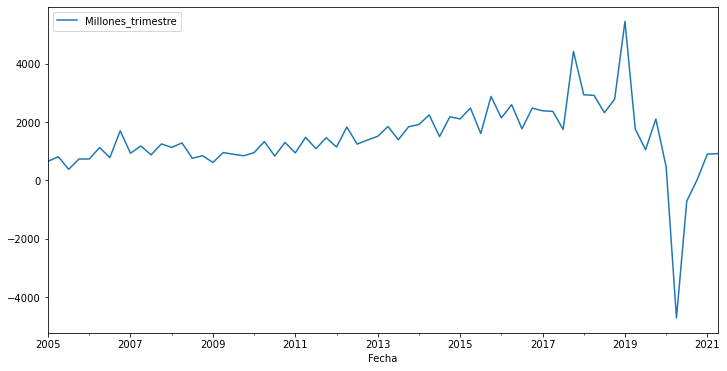

In [33]:
Disney.plot (figsize = (12, 6)) 
plt.show()

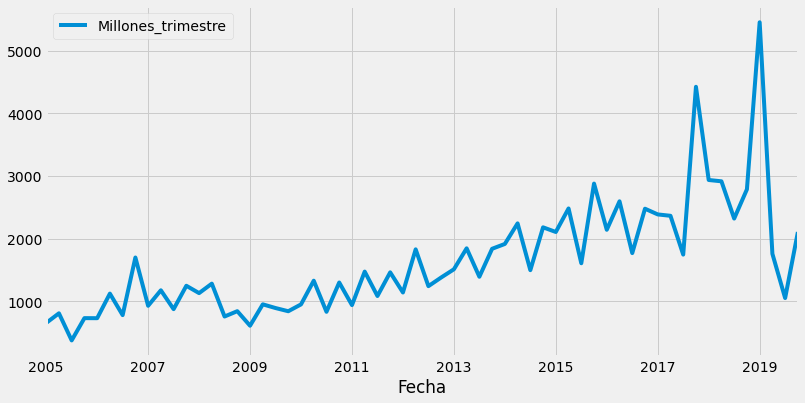

In [66]:
Disney_2019.plot (figsize = (12, 6)) 
plt.show()

In [67]:
import matplotlib

In [35]:
import statsmodels.api as sm

<Figure size 1080x720 with 0 Axes>

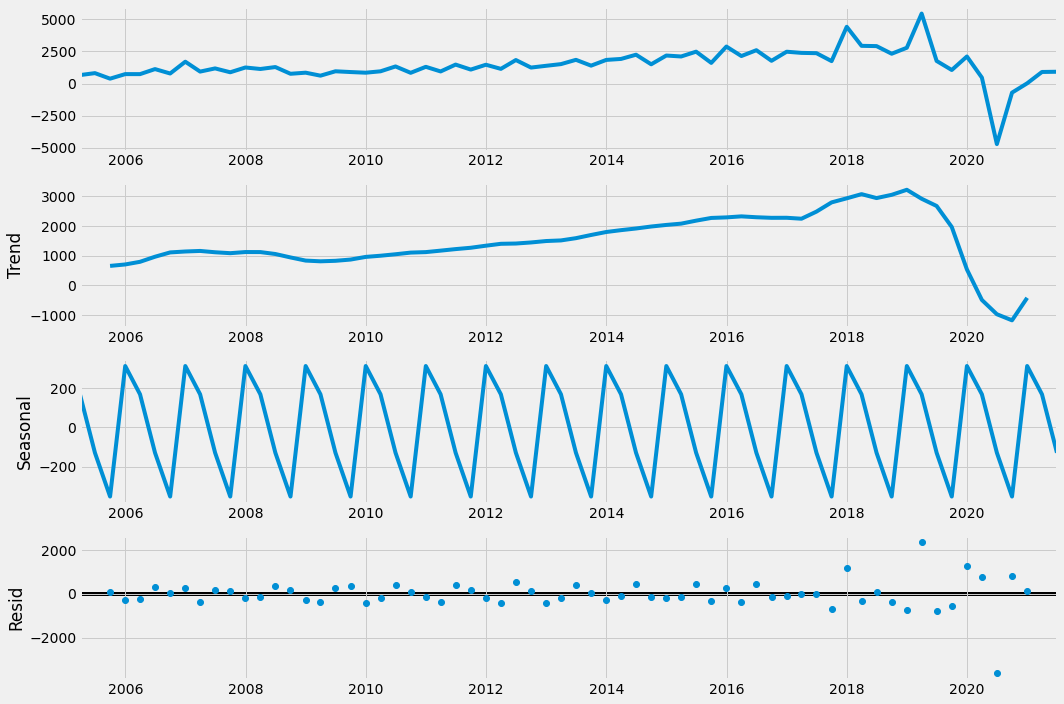

In [68]:
matplotlib.rcParams['figure.figsize'] = 15, 10
fig = plt.figure(figsize=[15, 10])
decomposition = sm.tsa.seasonal_decompose(Disney, model='aditive')
fig = decomposition.plot()
plt.show();

<Figure size 1080x720 with 0 Axes>

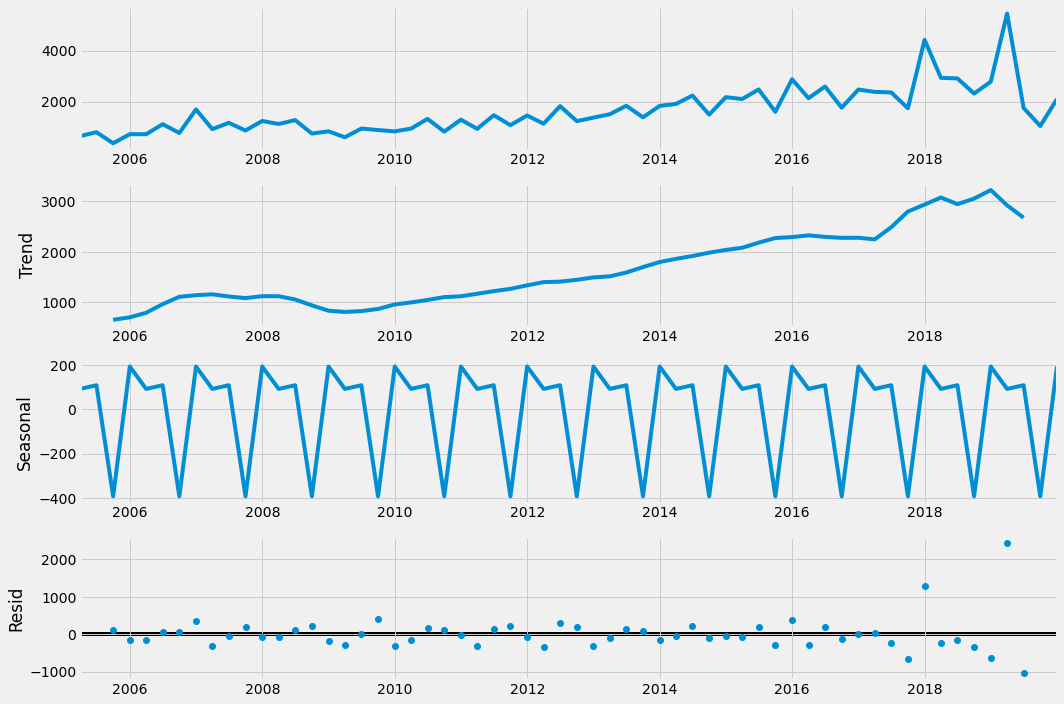

In [69]:
matplotlib.rcParams['figure.figsize'] = 15, 10
fig = plt.figure(figsize=[15, 10])
decomposition = sm.tsa.seasonal_decompose(Disney_2019, model='aditive')
fig = decomposition.plot()
plt.show();

<Figure size 1080x720 with 0 Axes>

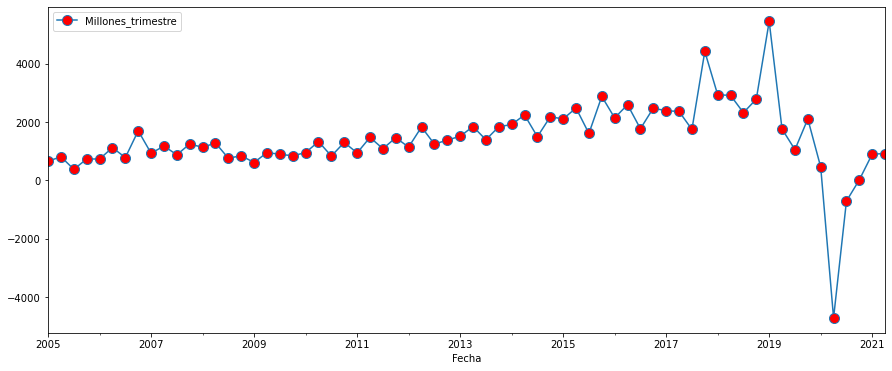

In [37]:
fig = plt.figure(facecolor='w')
Disney.plot(figsize=[15, 6], marker='o', markersize=10, markerfacecolor='r');

<Figure size 1080x720 with 0 Axes>

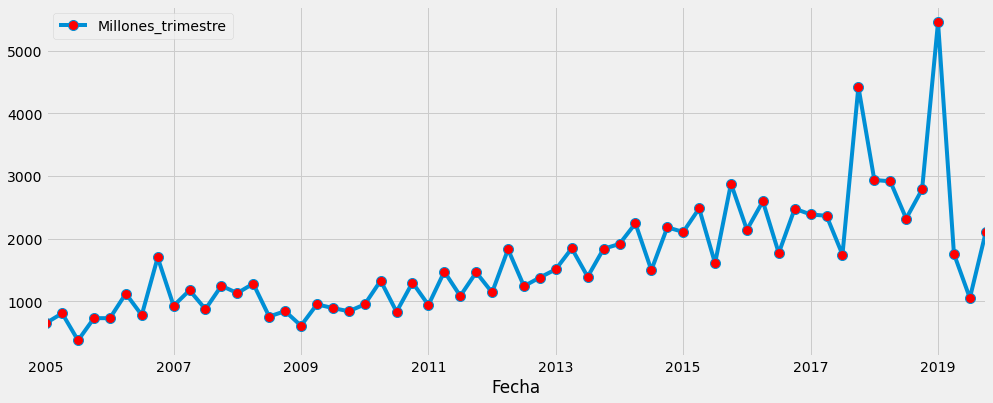

In [70]:
fig = plt.figure(facecolor='w')
Disney_2019.plot(figsize=[15, 6], marker='o', markersize=10, markerfacecolor='r');

In [38]:
type(Disney)

pandas.core.frame.DataFrame

In [39]:
model = sm.tsa.statespace.SARIMAX(
    Disney,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 0, 12),
    enforce_stationarity=False
)

results = model.fit()

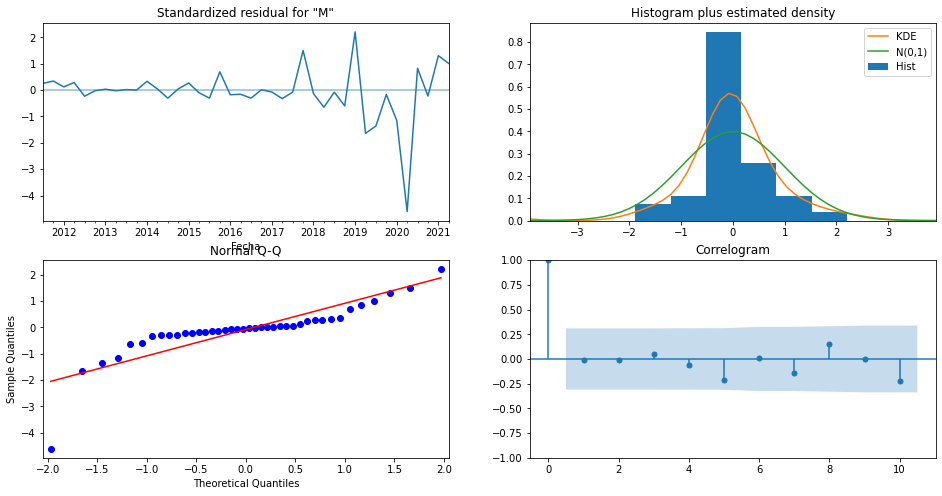

In [40]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

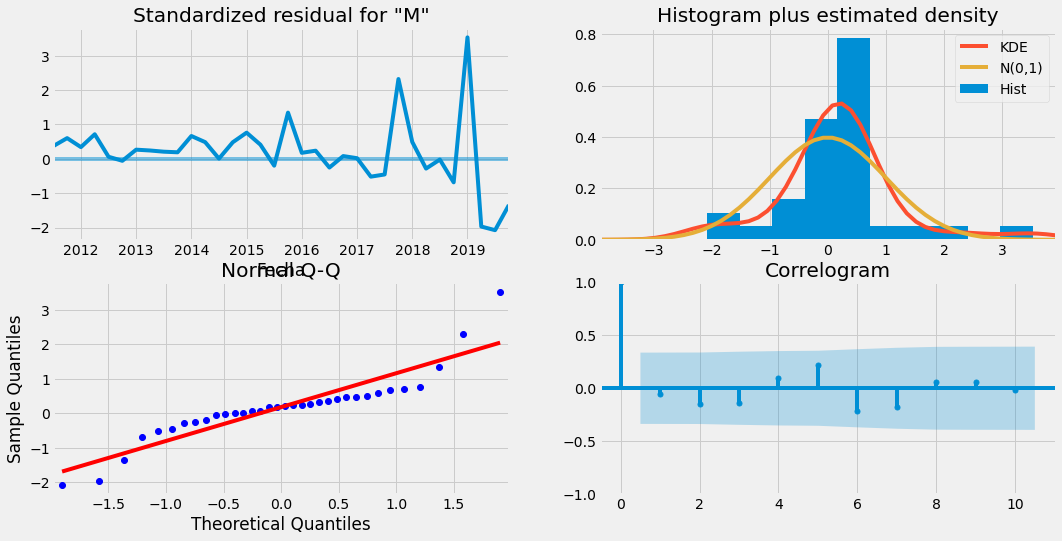

In [71]:
model = sm.tsa.statespace.SARIMAX(
    Disney_2019,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 0, 12),
    enforce_stationarity=False
)

results = model.fit()

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [73]:
pred = results.get_prediction(start=pd.to_datetime('2020-03-31'),end=pd.to_datetime('2020-12-31'))
pred_conf_int = pred.conf_int()
pred_conf_int

,lower Millones_trimestre,upper Millones_trimestre
2020-03-31,1478.112681,4450.114442
2020-06-30,1492.265606,4465.718460
2020-09-30,838.194049,3823.024335
2020-12-31,2999.907874,5995.246018


In [74]:
pred_conf_int.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2020-03-31 to 2020-12-31
Freq: Q-DEC
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lower Millones_trimestre  4 non-null      float64
 1   upper Millones_trimestre  4 non-null      float64
dtypes: float64(2)
memory usage: 96.0 bytes


In [80]:
pred_ = results.get_prediction(start=pd.to_datetime('2021-03-31'),end=pd.to_datetime('2021-12-31'))
pred_conf_int_= pred.conf_int()
pred_conf_int_

,lower Millones_trimestre,upper Millones_trimestre
2020-03-31,1478.112681,4450.114442
2020-06-30,1492.265606,4465.718460
2020-09-30,838.194049,3823.024335
2020-12-31,2999.907874,5995.246018


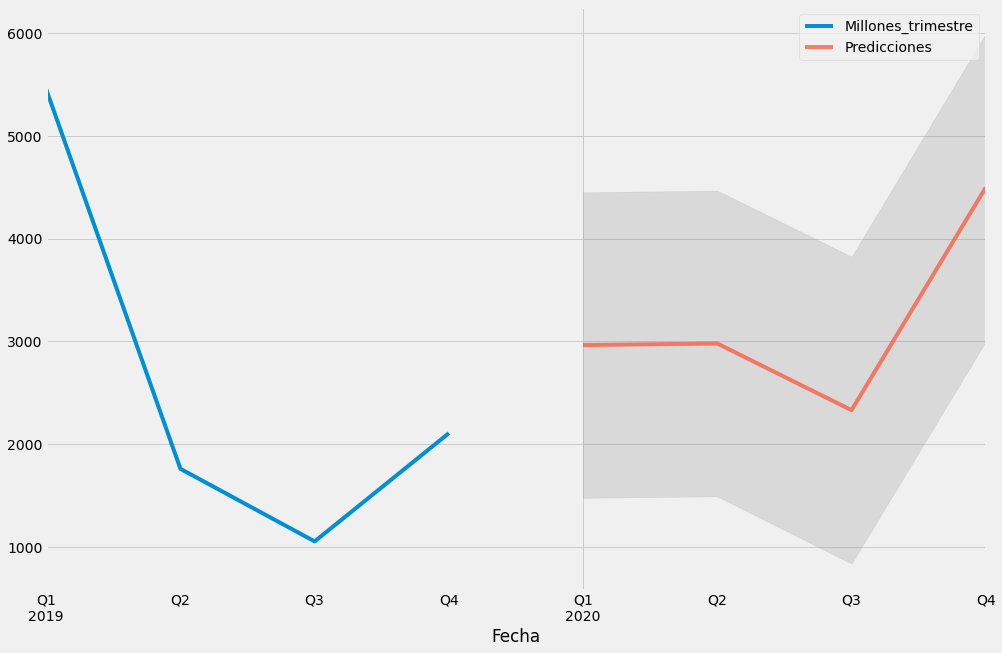

In [75]:
ax = Disney_2019['2019':].plot(label='Datos Observados')

pred.predicted_mean.plot(ax=ax, label='Predicciones', alpha=0.7, figsize=(15, 10))

ax.fill_between(pred_conf_int.index,
                pred_conf_int.iloc[:, 0], 
                pred_conf_int.iloc[:, 1], 
                color='gray',
                alpha=0.2)

plt.legend()
plt.show();

In [44]:
import numpy as np
import pandas as pd

import seaborn as sns
import pylab as plt

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error as mse 

plt.style.use('fivethirtyeight')

In [105]:
conda install libpython m2w64-toolchain -c msys2

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Clemente\anaconda3

  added / updated specs:
    - libpython
    - m2w64-toolchain


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    libpython-2.1              |           py38_0          49 KB
    m2w64-binutils-2.25.1      |                5        44.3 MB  msys2
    m2w64-bzip2-1.0.6          |                6         100 KB  msys2
    m2w64-crt-git-5.0.0.4636.2595836|                2         3.4 MB  msys2
    m2w64-gcc-5.3.0            |                6        41.1 MB  msys2
    m2w64-gcc-ada-5.3.0        |                6        33.5 MB  msys2
    m2w64-gcc-fortran-5.3.0    |                6        10.3 MB  msys2
    m2w64-gcc-objc-5.3.0       |           

In [107]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [51]:
Disney_anual=pd.read_csv('Dinesy_an.csv')
Disney_anual['Millones$_anual']

0     -2.864
1     11.054
2     12.598
3      8.980
4      9.391
5      8.382
6      7.501
7      6.136
8      5.682
9      4.807
10     3.963
11     3.307
12     4.427
13     4.687
14     3.374
15     2.533
Name: Millones$_anual, dtype: float64

In [52]:
Disney_= Disney_anual.sort_values(by='Fecha').groupby('Fecha').sum()
Disney_.head()

,Millones$_anual
Fecha,
2005,2.533
2006,3.374
2007,4.687
2008,4.427
2009,3.307


In [53]:
Disney_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2005 to 2020
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Millones$_anual  16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


In [54]:
Disney_['Millones$_anual'].min(), Disney_['Millones$_anual'].max()

(-2.864, 12.598)

In [55]:
Disney_.isnull().sum()

Millones$_anual    0
dtype: int64

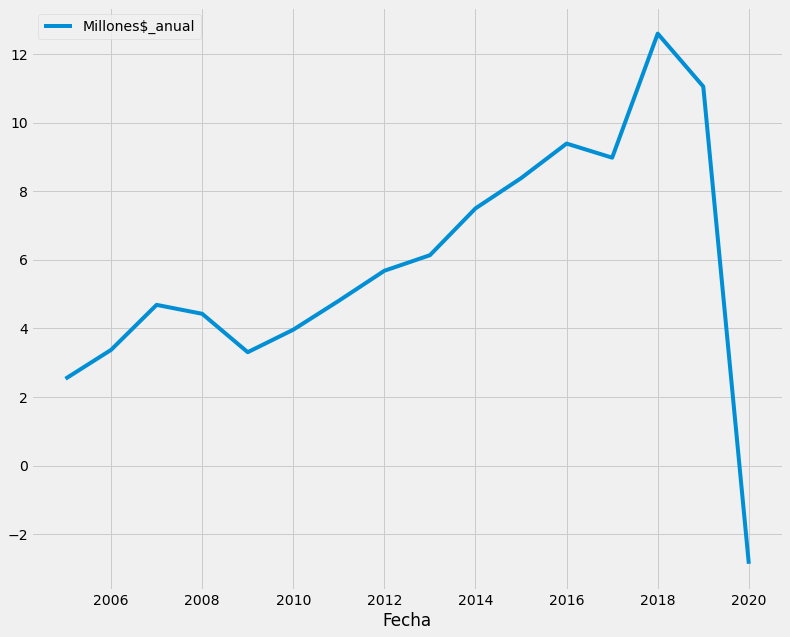

In [60]:
Disney_.plot (figsize = (12, 10)) 
plt.show()